In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datasets 
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from baseline_datamodules import LABEL_ORDER, LABEL_ORDER_DICT

from galaxy_datasets.shared import label_metadata


In [95]:
def load_test_preds(test_preds_loc):
    df = pd.read_csv(test_preds_loc)
    test_dataset = datasets.load_dataset("mwalmsley/gz_evo", name='default', split='test')
    test_dataset = test_dataset.remove_columns("image")
    test_dataset.set_format('pandas')
    df = pd.merge(test_dataset.data.to_pandas(), df, on='id_str', how='inner', validate='1:1', suffixes=('_vol', '_ml'))
    return df

In [96]:
def get_overall_metrics(df):

    results = []
    index_labels = df['summary'].map(LABEL_ORDER_DICT)
    # onehot_labels = pd.get_dummies(df['summary']).astype(float).values
    predictions = df[LABEL_ORDER].values
    # accuracy = accuracy_score(index_labels, predictions)
    accuracy = accuracy_score(index_labels, np.argmax(predictions, axis=1))
    return accuracy

In [97]:
    # onehot_labels = pd.get_dummies(df['summary']).astype(float).values
    # predictions = df[LABEL_ORDER].values

In [98]:
# onehot_labels

In [99]:
# predictions

In [100]:
local_dir = '/home/walml/repos/gz-evo/results/baselines/classification/'

In [101]:
results = []
for dataset_name, architecture_name, checkpoint_dir in [
    ('gz_evo', 'resnet50', local_dir + 'resnet50_534895718'),
    ('gz_evo', 'convnext_pico',  local_dir + 'convnext_pico_534895718'),
    ('gz_evo', 'maxvit_tiny_rw_224',  local_dir + 'maxvit_tiny_rw_224_534895718'),
    ('gz_evo', 'tf_efficientnetv2_s',  local_dir + 'tf_efficientnetv2_s_534895718'),
    ('gz_evo', 'convnext_base',  local_dir + 'convnext_base_534895718')
    # ('gz_evo', 'convnext_base.clip_laion2b_augreg_ft_in12k', local_dir + 'convnext_base.clip_laion2b_augreg_ft_in12k_534895718'),

    # ('gz_evo', 'resnet50_clip.openai', local_dir + 'resnet50_clip.openai_534895718'),
    # ('gz_evo', 'convnextv2_base.fcmae_ft_in22k_in1k', local_dir + 'convnextv2_base.fcmae_ft_in22k_in1k_534895718')
]:
    print(architecture_name)
    df = load_test_preds(checkpoint_dir + '/test_predictions.csv')
    acc = get_overall_metrics(df)
    results.append({
        'architecture_name': architecture_name,
        'accuracy': acc,
        'balanced_accuracy': balanced_accuracy_score(df['summary'].map(LABEL_ORDER_DICT), np.argmax(df[LABEL_ORDER].values, axis=1))
    })
results_df = pd.DataFrame(results)
    

resnet50


Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

convnext_pico


Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

maxvit_tiny_rw_224


Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

tf_efficientnetv2_s


Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

convnext_base


Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

In [102]:
results_df

,architecture_name,accuracy,balanced_accuracy
0,resnet50,0.908791,0.718587
1,convnext_pico,0.886910,0.612521
2,maxvit_tiny_rw_224,0.925541,0.797057
3,tf_efficientnetv2_s,0.924549,0.790827
4,convnext_base,0.929551,0.818184


In [103]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(df[LABEL_ORDER], df['summary'])
dummy.score(df[LABEL_ORDER], df['summary'])

0.5286927653703544

In [104]:

model_names = {
    'convnext_pico': 'ConvNeXt-Pico',
    'convnext_base': 'ConvNeXt-Base',
    'maxvit_tiny_rw_224': 'MaxViT Tiny',
    'tf_efficientnetv2_s': 'EfficientNetV2 S',
    'resnet50': 'ResNet50',
}
results_df['model_name'] = results_df['architecture_name'].map(model_names)

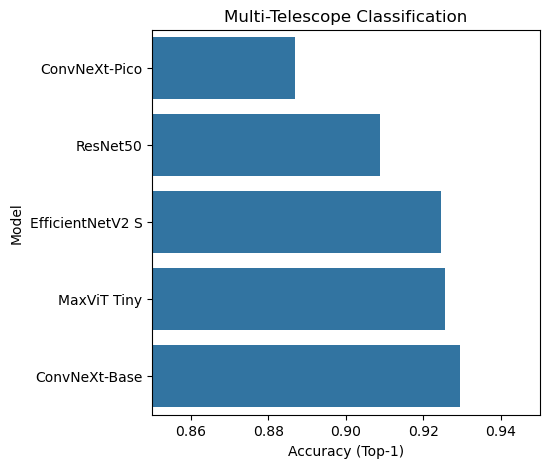

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.barplot(data=results_df.sort_values('accuracy'), x='accuracy', y='model_name', ax=ax)
ax.set_xlim(0.85, .95)
ax.set_xlabel('Accuracy (Top-1)')
ax.set_ylabel('Model')
ax.set_title('Multi-Telescope Classification')
fig.savefig('classification_overall.png', dpi=300)
fig.savefig('classification_overall.pdf', dpi=300)


Text(0.5, 1.0, 'Multi-Telescope Classification')

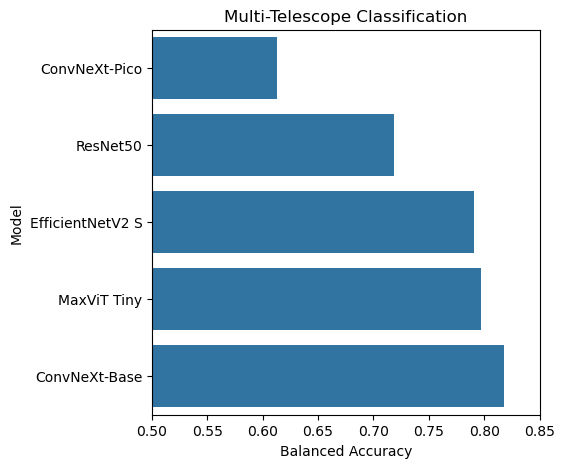

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.barplot(data=results_df.sort_values('balanced_accuracy'), x='balanced_accuracy', y='model_name', ax=ax)
ax.set_xlim(0.5, .85)
ax.set_xlabel('Balanced Accuracy')
ax.set_ylabel('Model')
ax.set_title('Multi-Telescope Classification')
# fig.savefig('classification_overall.png', dpi=300)
# fig.savefig('classification_overall.pdf', dpi=300)


In [106]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(df['summary'].map(LABEL_ORDER_DICT), np.argmax(df[LABEL_ORDER].values, axis=1))

cm

array([[24303,     9,   157,     2,    19,    35],
       [    3,  7720,    19,   261,     5,     9],
       [  287,    56,  6366,    51,   523,   170],
       [    3,   568,    19,  2332,     4,     7],
       [   84,    16,   456,    13,  1840,    47],
       [   89,    29,   260,    23,    44,   559]])

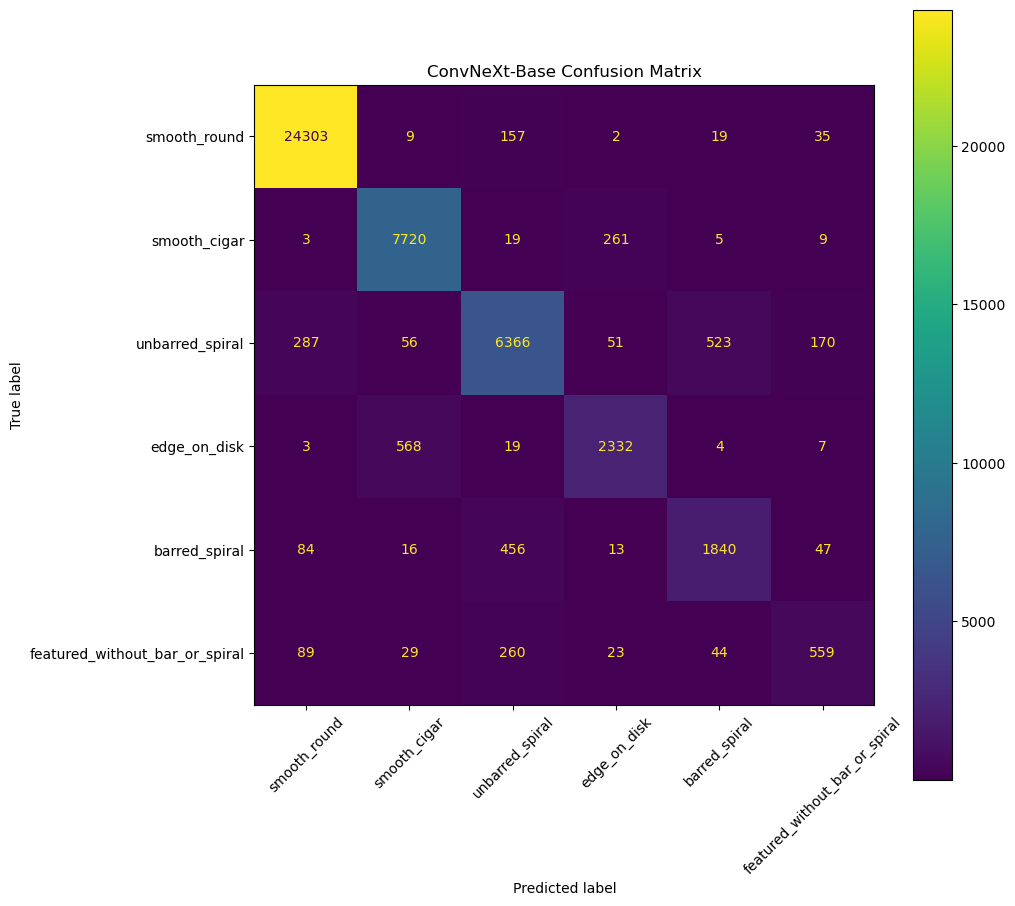

In [120]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ConfusionMatrixDisplay(cm, display_labels=LABEL_ORDER).plot(xticks_rotation=45, values_format='d', ax=ax)
ax.set_title('ConvNeXt-Base Confusion Matrix')
fig.savefig('classification_confusion_matrix.png', dpi=300)
fig.savefig('classification_confusion_matrix.pdf', dpi=300)